# Features 

## Importation des librairies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#Fonctions statistiques 
import scipy.stats

# ACP
import sklearn.decomposition as sd
import sklearn.preprocessing as sp
# FFT
from scipy.fftpack import fft
# Hierarchical clustering
import scipy.cluster.hierarchy as sch
#Wavelet
import pywt
from pywt import wavedec
from statsmodels.robust import mad
# LOF
import sklearn.neighbors as sn
# Isolation Forest
import sklearn.ensemble as se

# Plot et Display
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sb
sb.set()
sb.set_style("whitegrid")

## Importation des données

On lit les données d'apprentissage et de test et on forme une liste de toutes les données contenant au total 428 vols.

In [86]:
#path_appr = "../Donnees_projet/Ensemble_apprentissage/"
#path_test = "../Donnees_projet/Ensemble_test/"
#path_appr = "../../4A/Projet/Ensemble d'apprentissage/"
#path_test = "../../4A/Projet/Ensemble de test/"
path_appr = "../DetecAnomal/Ensemble d'apprentissage/"
path_test ="../DetecAnomal/Ensemble de test/"

In [87]:
# Liste des séries d'apprentissage
files = os.listdir(path_appr)
liste_appr = [pd.read_csv(path_appr + file) for file in files]
# Liste des séries de test
files = os.listdir(path_test)
liste_test = [pd.read_csv(path_test + file) for file in files]
# Liste complète
liste_comp = liste_appr + liste_test
n = len(liste_comp) 

On observe que toutes les séries se terminent par un fort pic. On fait le choix de l'enlever car il n'apporte rien de significatif et risque de perturber l'analyse. 

In [88]:
def enlever_pic(serie, seuil=10, pts_moy=2, plot=False) :
    """Retire le pic final, le seuil est le plus petit accroissement considéré comme appartenant
    encore au pic. Les accroissements sont moyennés sur plusieurs points pour ne pas être sensibles 
    aux possibles irrégularités dans le pic.
    L'option plot=True permet de vérifier graphiquement le résultat.
    Retourne le dataframe tronqué"""

    val_serie = serie["FF_1"].values
    if plot :
        plt.plot(val_serie)
        
    accr = abs(val_serie[1:] - val_serie[:-1])
    moy_accr = [np.mean(accr[i : i + pts_moy]) for i in range(len(accr) - pts_moy)]

    for ind, val in enumerate(moy_accr[::-1]) :
        if val < seuil and ind >= 1 :
            if plot :
                plt.plot(val_serie[:-ind], color="red")
                plt.show()
                
            return serie.drop(serie.index[-ind:])
            break
    else : 
        return serie

In [89]:
liste_comp = [enlever_pic(serie) for serie in liste_comp] 

## Liste des features que l'on veut  

- min, max
- mean 
- écart type 
- Skewness 
- Kurtosis 
- Energy 
- Average Crossing 
- Distribution spectrale d'énergie 
- Pourcentage d'extrema locaux 

https://arc.aiaa.org/doi/pdf/10.2514/6.2016-2430

### Min & Max 

In [90]:
listeMin = [min(liste["FF_1"]) for liste in liste_comp]

In [91]:
print(listeMin)
#len(listeMin)

[1304.0, 1288.0, 1304.0, 1296.0, 1304.0, 1304.0, 1304.0, 1280.0, 1312.0, 0.0, 1280.0, 1320.0, 1296.0, 1288.0, 1256.0, 1304.0, 1256.0, 1280.0, 1296.0, 1288.0, 1320.0, 1272.0, 1288.0, 1280.0, 1304.0, 1312.0, 1264.0, 1280.0, 1248.0, 1288.0, 1256.0, 1296.0, 1320.0, 1264.0, 1280.0, 1296.0, 1312.0, 1280.0, 1312.0, 1288.0, 1320.0, 1264.0, 1296.0, 1304.0, 1288.0, 0.0, 1312.0, 1296.0, 1280.0, 1288.0, 1264.0, 1296.0, 1304.0, 1312.0, 1320.0, 1344.0, 1304.0, 1272.0, 1344.0, 1320.0, 1376.0, 1304.0, 1384.0, 1464.0, 1424.0, 1304.0, 1288.0, 1312.0, 1376.0, 1304.0, 1272.0, 1304.0, 1272.0, 1288.0, 1312.0, 1288.0, 1320.0, 1312.0, 1384.0, 1304.0, 1328.0, 1320.0, 1296.0, 1320.0, 1312.0, 1312.0, 1280.0, 1336.0, 1320.0, 1392.0, 1304.0, 1320.0, 0.0, 1312.0, 1304.0, 1448.0, 1288.0, 1320.0, 1304.0, 1312.0, 1304.0, 1408.0, 1312.0, 1312.0, 1296.0, 1288.0, 1368.0, 1288.0, 1296.0, 1304.0, 1304.0, 1288.0, 1304.0, 1336.0, 1312.0, 1288.0, 1304.0, 1304.0, 1288.0, 1296.0, 1296.0, 1288.0, 1288.0, 1264.0, 1280.0, 1312.0, 

On récupère les numéros de séries dont le min est à 0. 

In [92]:
listeMin.index(0.0)

9

In [93]:
listeMax = [max(liste["FF_1"]) for liste in liste_comp]

In [94]:
#print(listeMax)
#len(listeMax)

### Mean

In [95]:
listeMean = [np.mean(liste["FF_1"]) for liste in liste_comp]

In [96]:
#print(listeMean)

### Ecartype 

In [97]:
listeStd = [np.std(liste["FF_1"]) for liste in liste_comp]

In [98]:
#print(listeStd)

### Skewness

In [99]:
listeSkewness = [scipy.stats.skew(liste["FF_1"]) for liste in liste_comp]

In [100]:
#print(listeSkewness)

### Kurtosis

In [101]:
listeKurtosis = [scipy.stats.kurtosis(liste["FF_1"]) for liste in liste_comp]

In [102]:
#print(listeKurtosis)

### Energy 

In [103]:
listeEnergy = [sum(liste["FF_1"]**2)/len(liste["FF_1"]) for liste in liste_comp]

In [104]:
#print(listeEnergy)
#len(listeEnergy)

### Average Crossing

In [105]:
listeAverageCross = [sum(1*(liste["FF_1"] > np.mean(liste["FF_1"])))/len(liste["FF_1"]) for liste in liste_comp]

In [106]:
#len(listeAverageCross)

### Distribution Spectrale d'énergie 

## LA DATA FRAME 

In [107]:
dico = {"Min": listeMin, "Max": listeMax, "Moyenne": listeMean, "Ecart-type": listeStd, "Skewness" : listeSkewness, "Kurtosis": listeKurtosis, "Energie": listeEnergy, "Average_Crossing": listeAverageCross}
DataFeatures = pd.DataFrame(dico)

In [108]:
DataFeatures.head()

,Min,Max,Moyenne,Ecart-type,Skewness,Kurtosis,Energie,Average_Crossing
0,1304.0,4448.0,1676.138313,353.743517,5.056843,32.048654,2.934574e+06,0.721992
1,1288.0,3216.0,1639.582090,199.454741,3.860395,27.245877,2.728012e+06,0.814677
2,1304.0,1928.0,1601.178808,145.930360,-0.761269,-1.229682,2.585069e+06,0.683775
3,1296.0,3752.0,1713.142857,307.831826,2.774147,10.606197,3.029619e+06,0.182195
4,1304.0,3800.0,1728.565771,385.371486,3.022832,10.216017,3.136451e+06,0.120226


In [109]:
DataFeatures.describe()

,Min,Max,Moyenne,Ecart-type,Skewness,Kurtosis,Energie,Average_Crossing
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,4.280000e+02,428.000000
mean,1267.182243,3101.420561,1656.603301,270.675888,1.907803,10.491351,2.847834e+06,0.512964
std,236.189767,1048.894375,93.748192,146.685090,1.955418,11.438887,3.567020e+05,0.232140
min,0.000000,1624.000000,1148.946502,53.978124,-4.097189,-1.826071,1.845196e+06,0.056159
25%,1288.000000,2462.000000,1608.099752,160.476587,0.703066,2.753509,2.621012e+06,0.270561
50%,1304.000000,2976.000000,1646.082973,233.429497,2.130429,7.365873,2.768751e+06,0.609943
75%,1320.000000,3546.000000,1713.518607,331.378501,3.169176,14.256734,3.039343e+06,0.698510
max,1464.000000,14976.000000,1910.453608,1314.676516,8.332307,86.128651,5.026683e+06,0.861538


## ACP 

In [110]:
pca = sd.PCA()
data = DataFeatures[["Min","Max","Moyenne","Ecart-type","Skewness","Kurtosis","Energie", "Average_Crossing"]]
C = pca.fit_transform(sp.scale(data))

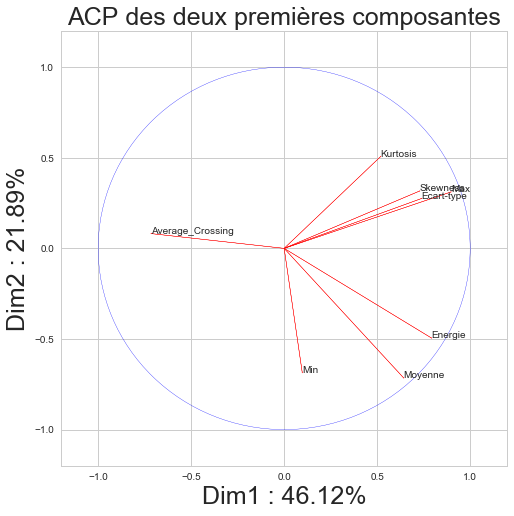

In [111]:
# coordonnées des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)
ax.set_xlabel("Dim1 : " + str(round(pca.explained_variance_ratio_[:10][0]*100,2))+ "%" ,size=25)
ax.set_ylabel("Dim2 : " + str(round(pca.explained_variance_ratio_[:10][1]*100,2)) + "%",size=25)
ax.set_title("ACP des deux premières composantes",size=25)
plt.show()

In [113]:
def plot_var_ACP(X_acp) :
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1,2,1)
    ax.bar(range(5), acp.explained_variance_ratio_[:5]*100, align='center', color='grey', ecolor='black')
    ax.set_xticks(range(10))
    ax.set_ylabel("Variance")
    ax.set_title("Pourcentage de variance expliquée \n des premières composantes", fontsize=20)

    ax = fig.add_subplot(1,2,2)
    box = ax.boxplot(X_acp[:, 0:10])
    ax.set_title("Distribution des premières composantes", fontsize=20)
    plt.show()
    
def plot_proj_ACP(X_acp, axe_1=0, axe_2=1, etiq=True) :
    fig = plt.figure(figsize=(13,8))
    ax = fig.add_subplot(1,1,1)
    dict_color = {True : "blue", False : "red"}

    for x, y, s in zip(X_acp[:,axe_1], X_acp[:,axe_2], range(len(liste_comp))) :
        ax.plot(x,y,marker=".", color=dict_color[s < len(liste_appr)])
        if etiq :
            ax.text(x, y, str(s))
       
    ax.set_title("Projection des invididus sur les \n  deux premières composantes", fontsize=20)

    legend_elements = [Line2D([0], [0], marker='.', color='blue', label='Série du jeu d\'apprentissage', markersize=10, linewidth=0),
                       Line2D([0], [0], marker='.', color='red', label='Série du jeu de test', markersize=10, linewidth=0)]

    ax.legend(handles=legend_elements)

    plt.show()

In [114]:
len(liste_appr)

300

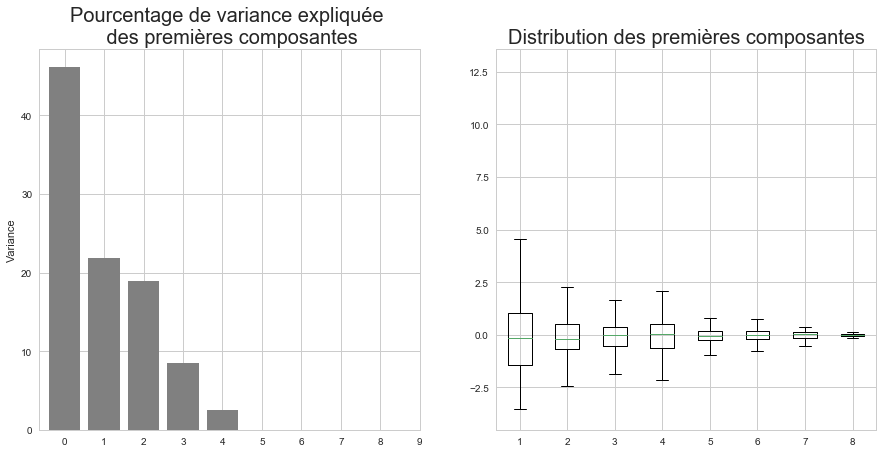

In [115]:
plot_var_ACP(C)

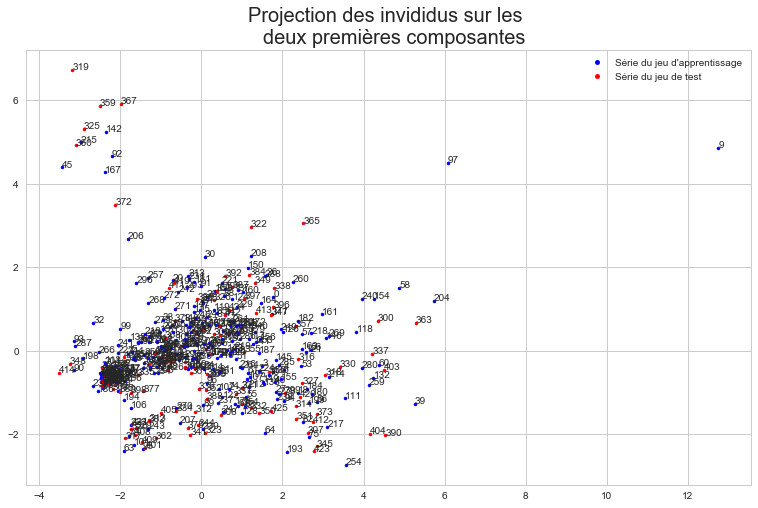

In [116]:
plot_proj_ACP(C)

## CAH 

In [121]:
def plot_dendro(Z) :
    fig = plt.figure(figsize=(25, 10))
    sch.dendrogram(Z, p=10, leaf_rotation=45., leaf_font_size=15, truncate_mode="level")  # font size for the x axis labels

    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    plt.show()
    


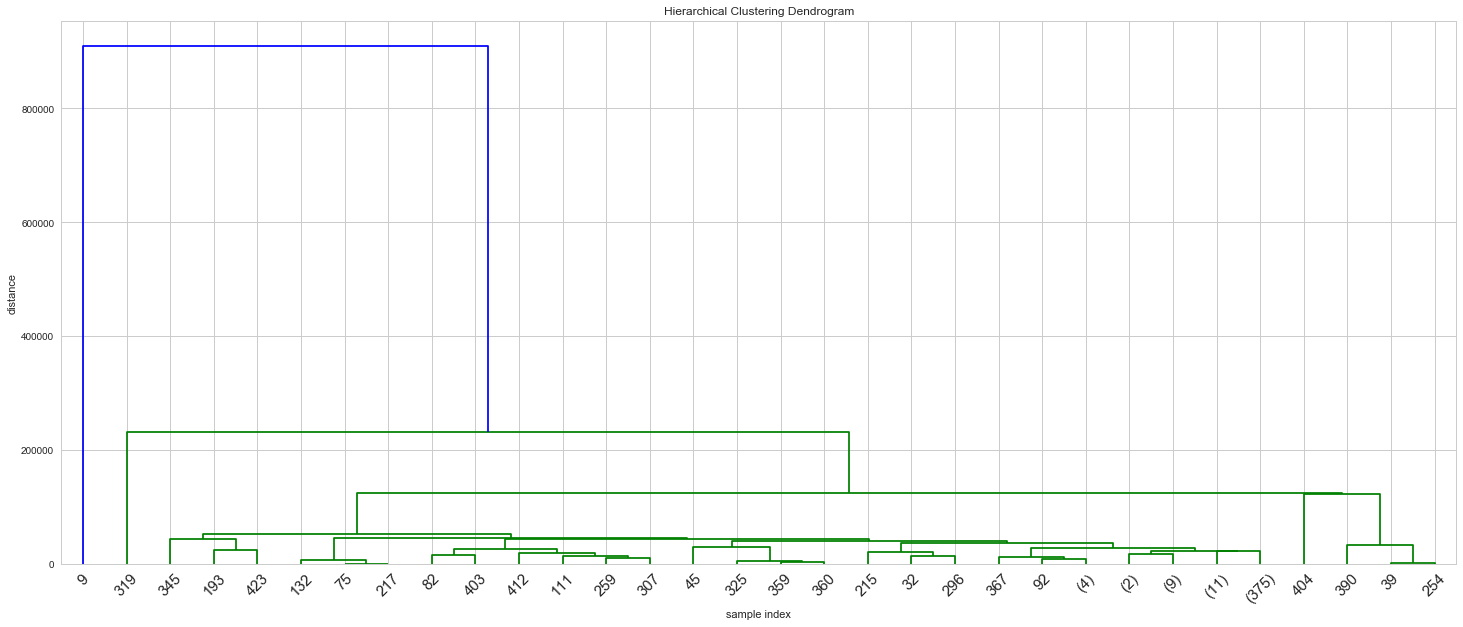

In [123]:
Z = sch.linkage(DataFeatures, 'single')
plot_dendro(Z)

## Isolation Forest 

In [129]:
def plot_result_IF(fig, ax, CT, title='', axis_x='', axis_y='', fontsize=25) :
    y_lim = (-1.13, 1.13)
    x_lim = [-5, len(liste_comp) + 5]
    CT_Normal = CT[CT.pred == 1]
    CT_Anomaly = CT[CT.pred == -1]
    
    ax.scatter(CT_Normal.index, - CT_Normal.pred, color="green")
    #ax.scatter(CT_Anomaly.index, - CT_Anomaly.pred, color="red", label="Anomaly")
    
    for x,y,s in zip(CT_Anomaly.index, - CT_Anomaly.pred, map(str,CT_Anomaly.index)):
        ax.text(x,y,s, horizontalalignment="center", verticalalignment="center", color="red")

    ax.plot(x_lim, [0,0], color="black")
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

In [131]:
clf = se.IsolationForest(n_estimators=100, contamination=20/428, bootstrap=True, n_jobs=-1)
clf.fit(DataFeatures)
y_pred = clf.predict(DataFeatures)

CT_IF = pd.DataFrame(list(y_pred), columns=["pred"]) 

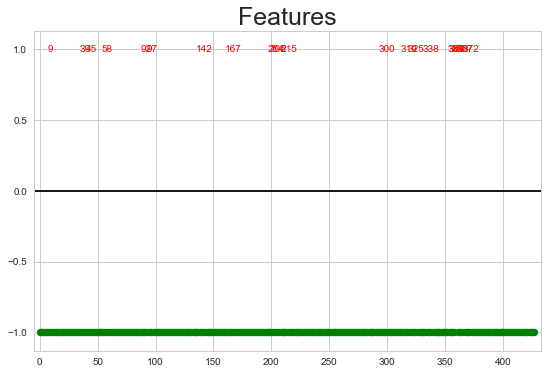

In [133]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(3,2,1)
plot_result_IF(fig, ax, CT_IF, title="Features", fontsize=25)

In [134]:
print("Anomalies : ", CT_IF[CT_IF.pred == -1].index.values)

Anomalies :  [  9  39  45  58  92  97 142 167 204 206 215 300 319 325 338 359 360 363
 367 372]


## OCSVM 

## # # #PRENDRE PIC OZONE 

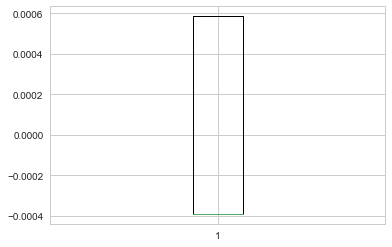

In [141]:
from sklearn.svm import OneClassSVM
clf=OneClassSVM(nu=0.1, gamma=0.01)
scoreSVM=clf.fit(DataFeatures)
scoreAtypSVM=clf._decision_function(DataFeatures)
plt.boxplot(scoreAtypSVM)
plt.show()